Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
data = pd.read_csv('Wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## EDA

In [4]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [5]:
#Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering
df = data.drop('Type',axis=1)

In [6]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
#checking for null values
df.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [9]:
#checking for duplicate values
df.duplicated().sum()

0

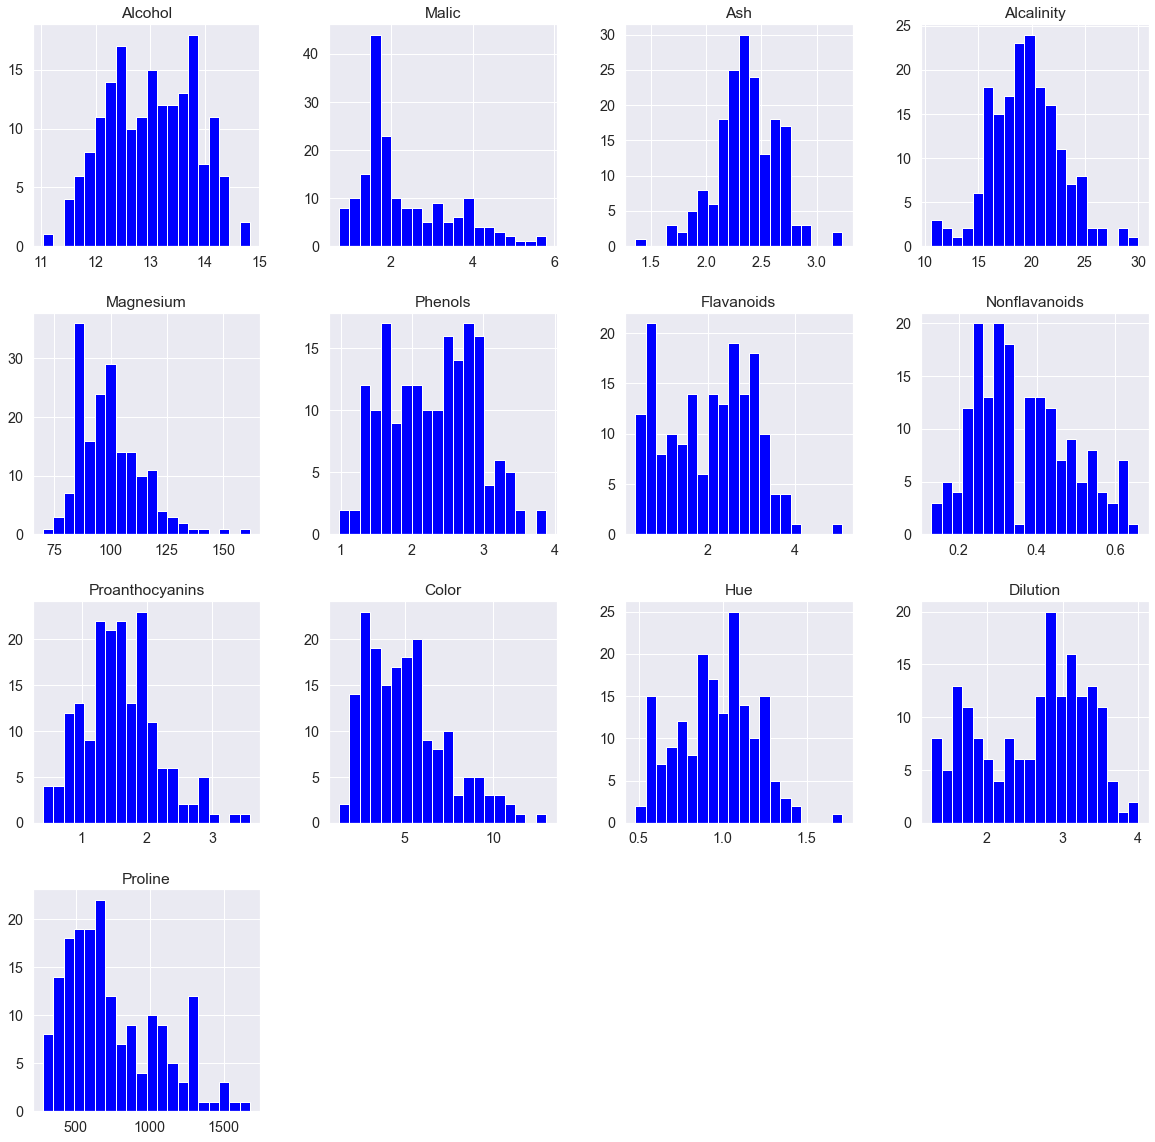

In [10]:
#Histogram visulization
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )

### Data Preprocessing

In [11]:
# Converting data to numpy array
data_ary=df.values
data_ary

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [12]:
# Normalizing the numerical data 
data_norm=scale(data_ary)
data_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## PCA Implementation

In [13]:
#PCA on normlization dataset
pca= PCA()
pca_values = pca.fit_transform(data_norm)
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [14]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

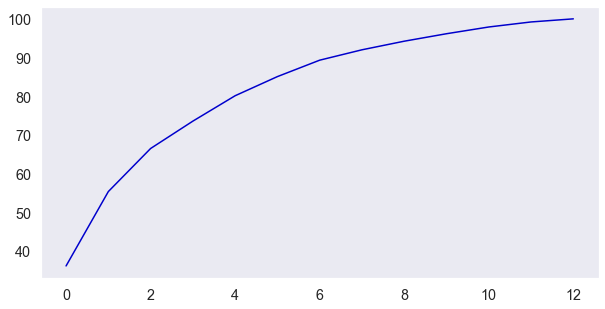

In [15]:
# Variance plot for PCA components obtained
fig=plt.figure(figsize=(10,5))
plt.plot(var1,color="#0000cc")

In [16]:
# dataframe on basis of normlization
pca_df= pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), data['Type']], axis = 1)
pca_df

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


<AxesSubplot:>

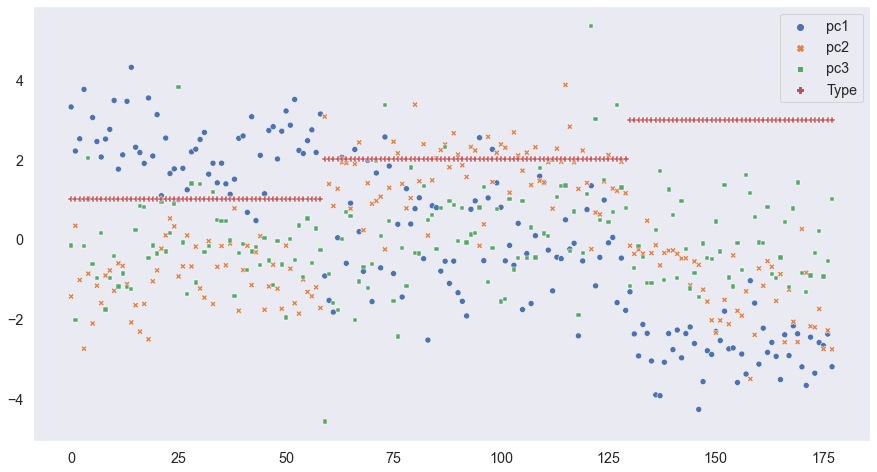

In [17]:
# Visualization of PCAs on normlization
fig=plt.figure(figsize=(15,8))
sns.scatterplot(data=pca_df)

## Hierarchical Clustering Algorithm

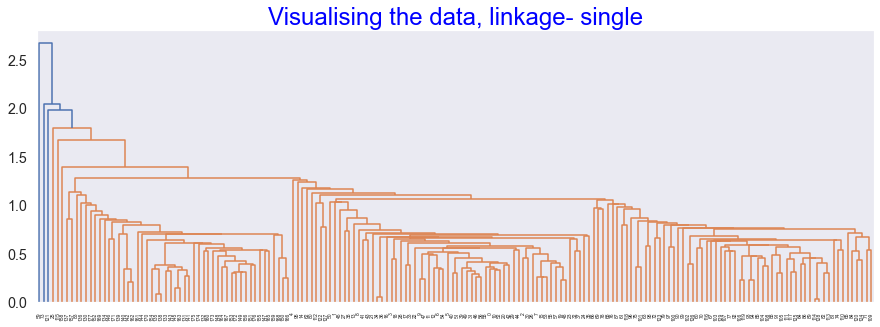

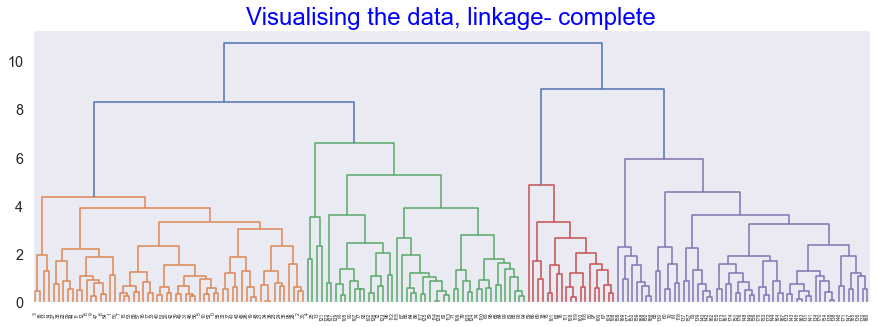

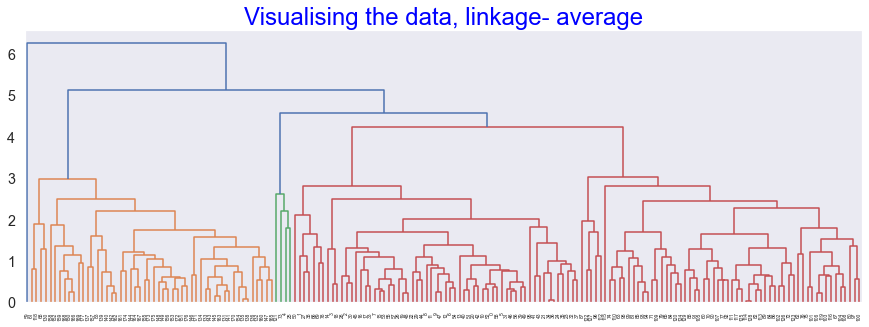

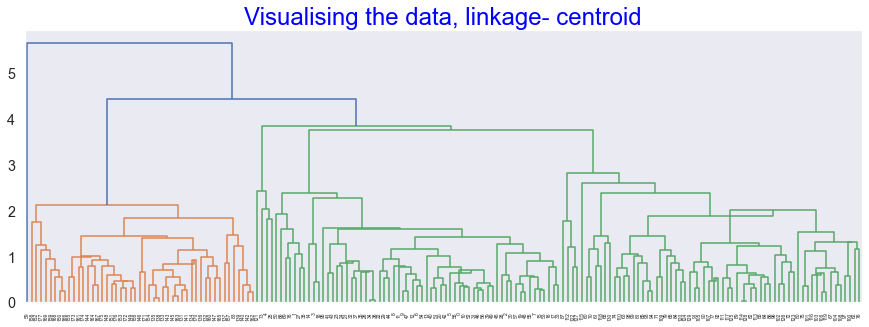

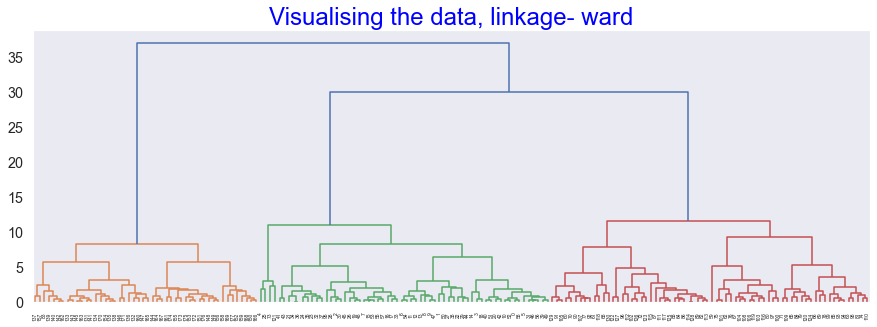

In [18]:
#Dendrogram for normalize dataset
for linkage in ['single','complete','average','centroid','ward']: 
    plt.figure(figsize =(15, 5)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, linkage- {}'.format(linkage),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_df, method = linkage,optimal_ordering=False))


In [19]:
#calculating silhouette score 
k = [2,3,4,5,6,7,8] 

for n in k:
    for linkages in ["ward", "complete", "average", "single"]:
        h_cluster1 = AgglomerativeClustering(n_clusters=n,linkage=linkages)
        h_labels1 = h_cluster1.fit_predict(pca_df)
        silhouette_score1 = silhouette_score(pca_df, h_labels1)
        print("For n_clusters =", n,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.413824806151829
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.3176105994770413
For n_clusters = 2 The average silhouette_score with linkage- average : 0.34685896076237915
For n_clusters = 2 The average silhouette_score with linkage- single : 0.34685896076237915

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.466832570110656
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.2858770893271514
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3977812097737346
For n_clusters = 3 The average silhouette_score with linkage- single : 0.11879611046670827

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3911399040548684
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4067458703800719
For n_clusters = 4 The average silhouette_score with linkage- average : 0.32383853138239893
For

### By observing dendogram and silhouette score for all linkage, ward linkage gives best value at k=3  

In [20]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(pca_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.value_counts()

Clusters
0           68
2           62
1           48
dtype: int64

In [21]:
# Concating Labels with main dataset copy
df['Hierarchical_labels'] = hc.labels_
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hierarchical_labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [22]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,
0,12.273235,1.903971,2.225735,19.925000,93.088235,2.224412,2.017059,0.359118,1.587647,3.036765,1.051706,2.753235,509.014706
1,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


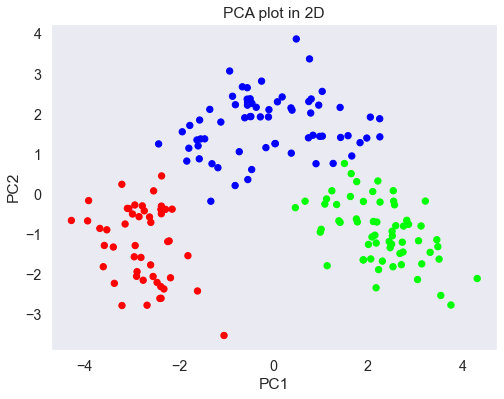

In [23]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Using t-SNE for better visualization

In [24]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(data_norm)
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])
print(tsne_df.shape)
tsne_df.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,-8.576659,-12.764333
1,-6.973514,-8.842142
2,-11.354135,-9.123071
3,-11.015813,-12.289305
4,-10.990769,-5.047472


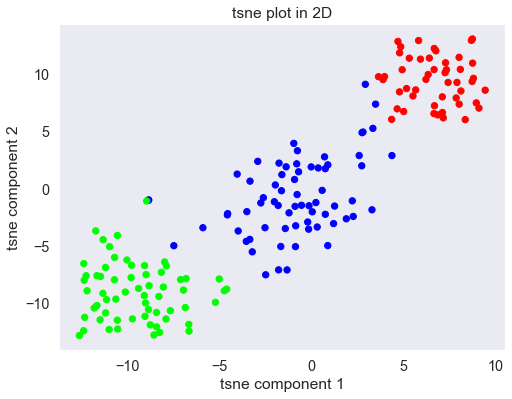

In [25]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('tsne plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')
plt.show()

#### We can now clearly see the 3 number of clusters formed

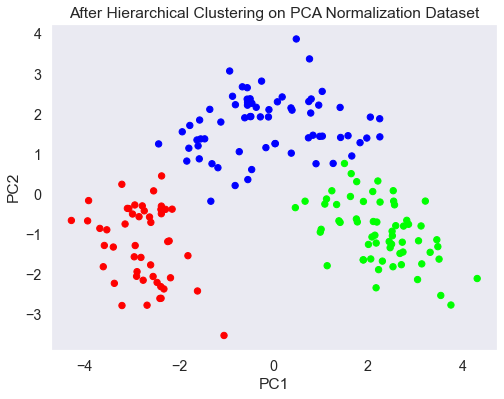

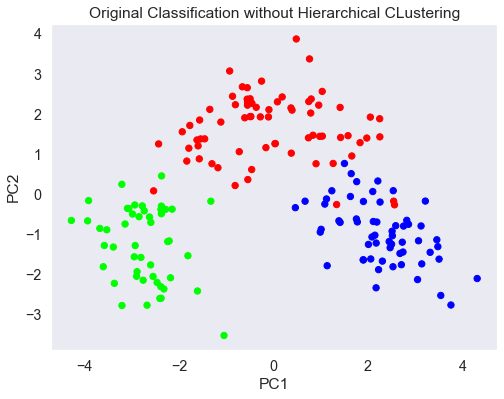

In [26]:
#Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature
# Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After Hierarchical Clustering on PCA Normalization Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [27]:
# Group data by Clusters (K=3)
display('After Applying Hierarchical CLustering on  PCA normalization Scaled Dataset',df.groupby('Hierarchical_labels').agg
        (['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical CLustering on  PCA normalization Scaled Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,
0,12.273235,1.903971,2.225735,19.925000,93.088235,2.224412,2.017059,0.359118,1.587647,3.036765,1.051706,2.753235,509.014706
1,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


'Original Classified Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


#### By performing hierarchical clustering we obtain 3 cluster that means we have perfectly clustered the data as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column
#### The 3 clusters which we obtained has not much difference as compared to original data.


# KMeans Clustering

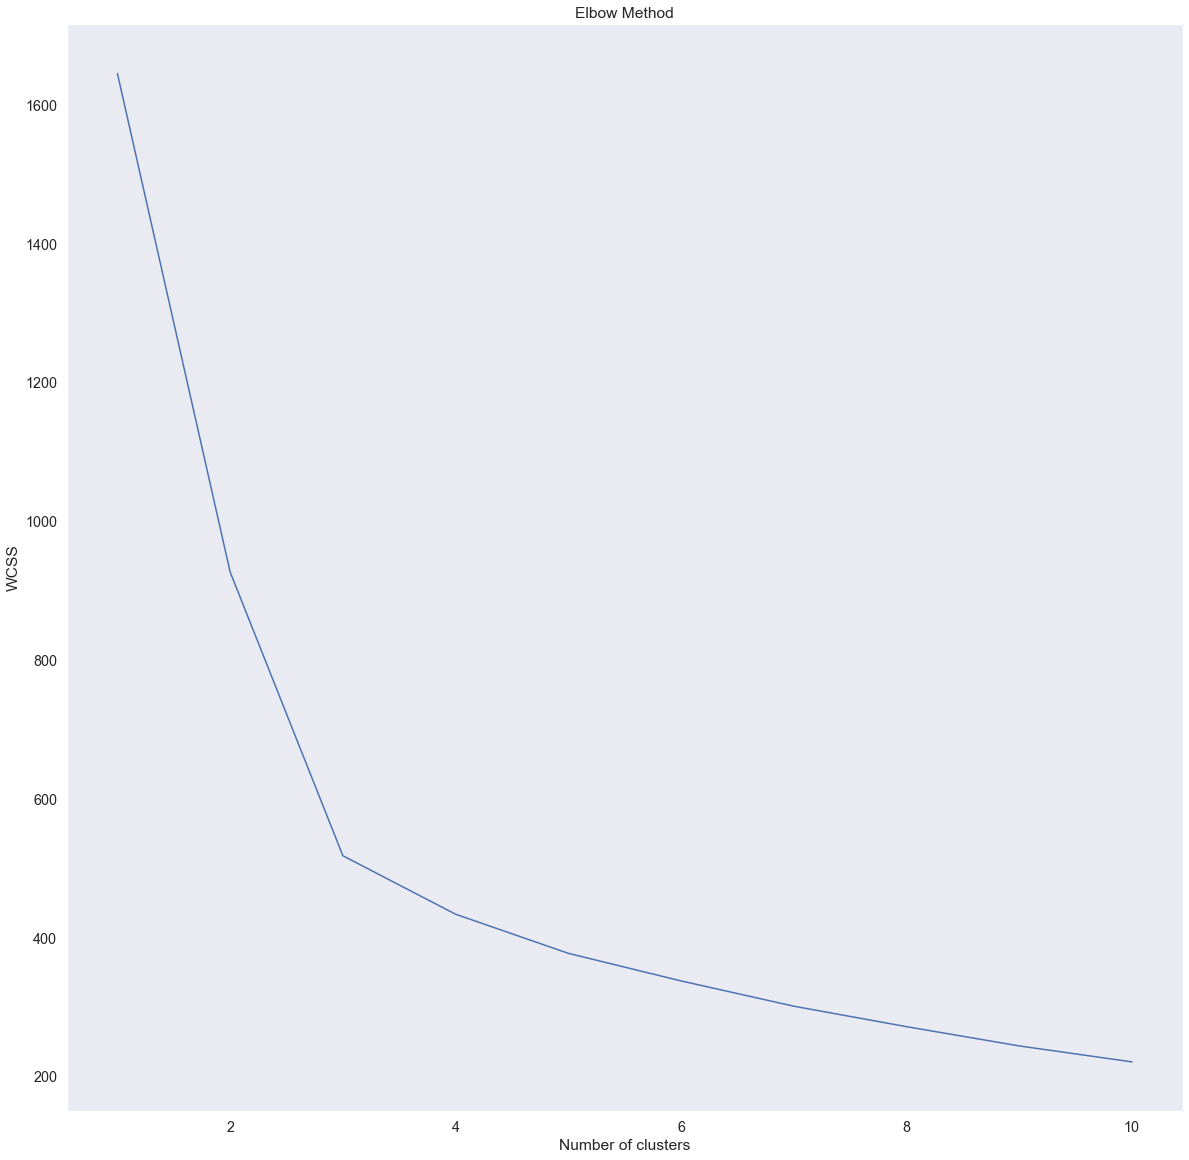

In [28]:
#finding k value by elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# implementing silhouette score
k=[2,3,4,5,6]
for n in k:
    c2 = KMeans(n,init='k-means++',)
    c2.fit(pca_df)
    c2.labels_
    # silhouette score
    sil_score= silhouette_score(pca_df, c2.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)
    
    

For k silhouette score = 2 
 0.40725857009463523
For k silhouette score = 3 
 0.4698461540710214
For k silhouette score = 4 
 0.4455968466495043
For k silhouette score = 5 
 0.41008166839188076
For k silhouette score = 6 
 0.3067637502803291


### By observing Elbow plot and silhouette score k-mean gives best value at k=3

In [30]:
#Build k-mean Cluster algorithm
clusters_new = KMeans(3, random_state=0,init='k-means++')
clusters_new.fit(pca_df)
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [33]:
#Assign clusters to the data set
df1=df.copy()
df1['Kmeans_label'] = clusters_new.labels_
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hierarchical_labels,Kmeans_label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1


In [34]:
df1.groupby('Kmeans_label').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hierarchical_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,,
0,13.144000,3.346200,2.42560,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000,0.96
1,13.676774,1.997903,2.46629,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,2.00
2,12.256818,1.889242,2.22803,20.013636,92.848485,2.244242,2.040303,0.360303,1.608939,3.015152,1.061455,2.785000,509.257576,0.00


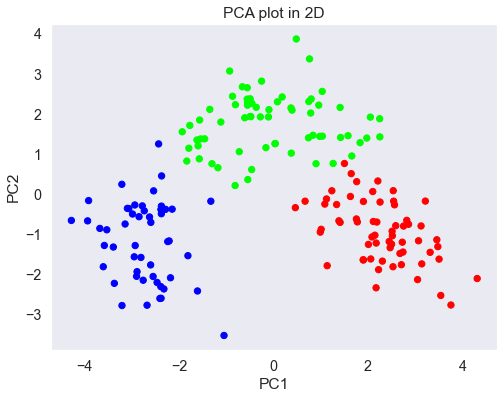

In [35]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=df1['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Using t-sne for better visualization

In [36]:
tsne1 = TSNE(n_components=2)
X_tsne1 = tsne1.fit_transform(data_norm)
tsne_df1 = pd.DataFrame(data = X_tsne1, columns = ['tsne comp. 1', 'tsne comp. 2'])
print(tsne_df1.shape)
tsne_df1.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,7.370478,-8.492712
1,5.370564,-4.811660
2,9.903841,-5.445061
3,9.411410,-8.331800
4,10.896178,-1.624856


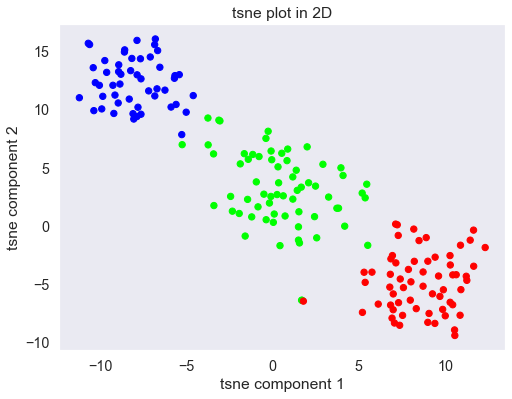

In [37]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df1.iloc[:,0], tsne_df1.iloc[:,1], c=df1['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('tsne plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')
plt.show()

### we can  see that their are 3 cluster formed

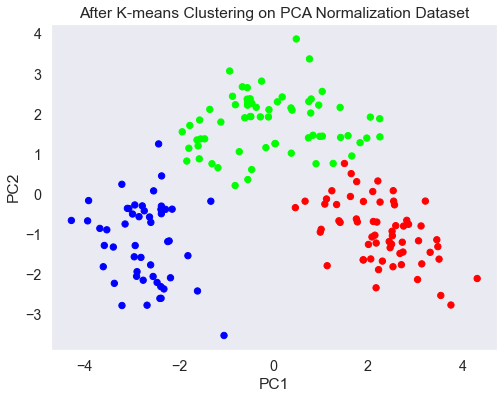

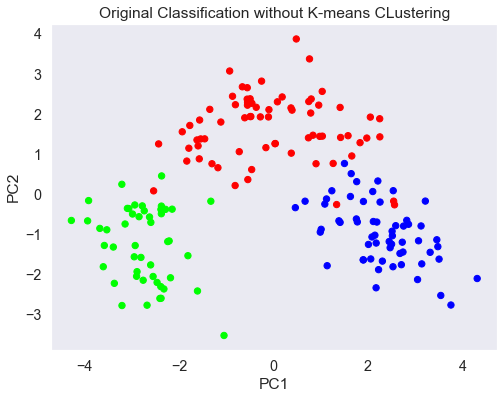

In [38]:
#Comparing k-mean Clusters with the Original Classified Dataset using "Type" Feature
# Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=df1['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('After K-means Clustering on PCA Normalization Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without K-means CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [39]:
# Group data by Clusters (K=3)
display('After Applying K-means CLustering on  PCA normalization Scaled Dataset',df1.groupby('Kmeans_label').agg
        (['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying K-means CLustering on  PCA normalization Scaled Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hierarchical_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,,
0,13.144000,3.346200,2.42560,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000,0.96
1,13.676774,1.997903,2.46629,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,2.00
2,12.256818,1.889242,2.22803,20.013636,92.848485,2.244242,2.040303,0.360303,1.608939,3.015152,1.061455,2.785000,509.257576,0.00


'Original Classified Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


#### By performing Kmeans clustering we obtain 3 cluster that means we have perfectly clustered the data as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column
#### The 3 clusters which we obtained has little bit difference as compared to original data.